# Merge data for AJIVE input

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid
import xarray
import dask
import dask.distributed

In [2]:
cluster = dask.distributed.LocalCluster(processes=True)
client = dask.distributed.Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:49776,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:49794,Total threads: 1
Dashboard: http://127.0.0.1:49795/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:49779,


In [3]:
clin_xr = (xarray.open_zarr('processed_data/processed_oai_clinical_std.zarr/')
           .set_index({'knee':['patient_id','side']})
          )
clin_xr

<xarray.Dataset>
Dimensions:       (knee: 6317)
Coordinates:
  * knee          (knee) object MultiIndex
  * patient_id    (knee) int64 9000099 9000099 9000296 ... 9999878 9999878
  * side          (knee) <U5 'right' 'left' 'right' ... 'left' 'right' 'left'
Data variables: (12/77)
    Asian race    (knee) float64 dask.array<chunksize=(6317,), meta=np.ndarray>
    Black race    (knee) float64 dask.array<chunksize=(6317,), meta=np.ndarray>
    BothHP12      (knee) float64 dask.array<chunksize=(6317,), meta=np.ndarray>
    BothHRS       (knee) float64 dask.array<chunksize=(6317,), meta=np.ndarray>
    Female Sex    (knee) int64 dask.array<chunksize=(6317,), meta=np.ndarray>
    Is Married    (knee) float64 dask.array<chunksize=(6317,), meta=np.ndarray>
    ...            ...
    V00eSFP       (knee) float64 dask.array<chunksize=(6317,), meta=np.ndarray>
    V00eSFR       (knee) float64 dask.array<chunksize=(6317,), meta=np.ndarray>
    V00fSFP       (knee) float64 dask.array<chunksize=(6317,), meta=np.ndarray>
    V00fSFR       (knee) float64 dask.array<chunksize=(6317,), meta=np.ndarray>
    V00fmaxf      (knee) float64 dask.array<chunksize=(6317,), meta=np.ndarray>
    White race    (knee) float64 dask.array<chunksize=(6317,), meta=np.ndarray>

In [4]:
fem_xr = xarray.open_zarr('/Volumes/T7/femoral_tall.zarr/', chunks='auto')['femoral']
fem_xr

<xarray.DataArray 'femoral' (map: 47837, x: 310, y: 310)>
dask.array<open_dataset-b8c2b7a799e3b3cb3230700a26ca3520femoral, shape=(47837, 310, 310), dtype=float32, chunksize=(300, 310, 310), chunktype=numpy.ndarray>
Coordinates:
    patient_id  (map) uint32 dask.array<chunksize=(47837,), meta=np.ndarray>
    side        (map) |S5 dask.array<chunksize=(47837,), meta=np.ndarray>
    timepoint   (map) uint8 dask.array<chunksize=(47837,), meta=np.ndarray>
Dimensions without coordinates: map, x, y

In [5]:
fem_xr.coords['side'] = fem_xr.coords['side'].astype('unicode')

In [6]:
fem_xr

<xarray.DataArray 'femoral' (map: 47837, x: 310, y: 310)>
dask.array<open_dataset-b8c2b7a799e3b3cb3230700a26ca3520femoral, shape=(47837, 310, 310), dtype=float32, chunksize=(300, 310, 310), chunktype=numpy.ndarray>
Coordinates:
    patient_id  (map) uint32 dask.array<chunksize=(47837,), meta=np.ndarray>
    side        (map) <U5 dask.array<chunksize=(47837,), meta=np.ndarray>
    timepoint   (map) uint8 dask.array<chunksize=(47837,), meta=np.ndarray>
Dimensions without coordinates: map, x, y

In [7]:
fem_baseline = fem_xr.set_index({'map':["patient_id", 'side','timepoint']}).sel(timepoint=0).rename({'map': 'knee'})
fem_baseline

<xarray.DataArray 'femoral' (knee: 9436, x: 310, y: 310)>
dask.array<getitem, shape=(9436, 310, 310), dtype=float32, chunksize=(73, 310, 310), chunktype=numpy.ndarray>
Coordinates:
  * knee        (knee) object MultiIndex
  * patient_id  (knee) uint32 9426421 9426421 9284909 ... 9508858 9508858
  * side        (knee) <U5 'right' 'left' 'right' ... 'left' 'right' 'left'
    timepoint   int64 0
Dimensions without coordinates: x, y

In [8]:
tib_xr = xarray.open_zarr('/Volumes/T7/tibial_tall.zarr/', chunks='auto')['tibial']
tib_xr.coords['side'] = tib_xr.coords['side'].astype('unicode')
tib_baseline = tib_xr.set_index({'map':["patient_id", 'side','timepoint']}).sel(timepoint=0).rename({'map': 'knee'})

In [9]:
ds = xarray.merge([clin_xr, fem_baseline, tib_baseline], join='inner')
ds

/opt/miniconda3/envs/baselinecartilage/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]
/opt/miniconda3/envs/baselinecartilage/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]


<xarray.Dataset>
Dimensions:       (knee: 6266, x: 310, y: 310)
Coordinates:
  * knee          (knee) object MultiIndex
  * patient_id    (knee) int64 9000099 9000099 9000296 ... 9999878 9999878
  * side          (knee) <U5 'right' 'left' 'right' ... 'left' 'right' 'left'
    timepoint     int64 0
Dimensions without coordinates: x, y
Data variables: (12/79)
    Asian race    (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    Black race    (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    BothHP12      (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    BothHRS       (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    Female Sex    (knee) int64 dask.array<chunksize=(6266,), meta=np.ndarray>
    Is Married    (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    ...            ...
    V00fSFP       (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    V00fSFR       (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    V00fmaxf      (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    White race    (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    femoral       (knee, x, y) float32 dask.array<chunksize=(2, 310, 310), meta=np.ndarray>
    tibial        (knee, x, y) float32 dask.array<chunksize=(2, 310, 310), meta=np.ndarray>

In [10]:
ds = xarray.merge([clin_xr, fem_baseline, tib_baseline], join='inner')
ds.persist()

/opt/miniconda3/envs/baselinecartilage/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]
/opt/miniconda3/envs/baselinecartilage/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]


<xarray.Dataset>
Dimensions:       (knee: 6266, x: 310, y: 310)
Coordinates:
  * knee          (knee) object MultiIndex
  * patient_id    (knee) int64 9000099 9000099 9000296 ... 9999878 9999878
  * side          (knee) <U5 'right' 'left' 'right' ... 'left' 'right' 'left'
    timepoint     int64 0
Dimensions without coordinates: x, y
Data variables: (12/79)
    Asian race    (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    Black race    (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    BothHP12      (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    BothHRS       (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    Female Sex    (knee) int64 dask.array<chunksize=(6266,), meta=np.ndarray>
    Is Married    (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    ...            ...
    V00fSFP       (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    V00fSFR       (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    V00fmaxf      (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    White race    (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    femoral       (knee, x, y) float32 dask.array<chunksize=(2, 310, 310), meta=np.ndarray>
    tibial        (knee, x, y) float32 dask.array<chunksize=(2, 310, 310), meta=np.ndarray>

In [11]:
fem_0 = ds['femoral'][0]
fem_0

<xarray.DataArray 'femoral' (x: 310, y: 310)>
dask.array<getitem, shape=(310, 310), dtype=float32, chunksize=(310, 310), chunktype=numpy.ndarray>
Coordinates:
    knee        object (9000099, 'right')
    patient_id  int64 9000099
    side        <U5 'right'
    timepoint   int64 0
Dimensions without coordinates: x, y

In [12]:
ds

<xarray.Dataset>
Dimensions:       (knee: 6266, x: 310, y: 310)
Coordinates:
  * knee          (knee) object MultiIndex
  * patient_id    (knee) int64 9000099 9000099 9000296 ... 9999878 9999878
  * side          (knee) <U5 'right' 'left' 'right' ... 'left' 'right' 'left'
    timepoint     int64 0
Dimensions without coordinates: x, y
Data variables: (12/79)
    Asian race    (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    Black race    (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    BothHP12      (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    BothHRS       (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    Female Sex    (knee) int64 dask.array<chunksize=(6266,), meta=np.ndarray>
    Is Married    (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    ...            ...
    V00fSFP       (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    V00fSFR       (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    V00fmaxf      (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    White race    (knee) float64 dask.array<chunksize=(6266,), meta=np.ndarray>
    femoral       (knee, x, y) float32 dask.array<chunksize=(2, 310, 310), meta=np.ndarray>
    tibial        (knee, x, y) float32 dask.array<chunksize=(2, 310, 310), meta=np.ndarray>

In [72]:
example_knee = ds.sel(knee=(9000099, 'left'))

patient_id = example_knee['patient_id'].data
side = example_knee['side'].data

In [73]:
def orient_femoral(map_):
    return map_.T

def orient_tibial(map_):
    return np.fliplr(map_.T)

In [69]:
def annotate_cartilage(ax):
    ax.use_sticky_edges = False
    ax.margins(.15)
    ax.set_xticks([0, 100, 200, 300])
    ax.set_yticks([0, 100, 200, 300])
    annotation_kwargs = {'xycoords': 'axes fraction', 'fontsize': 16, 'fontweight': 'bold', 'color': 'dimgray'}
    
    ax.annotate("P", (.5, .95), ha='center', va='top', **annotation_kwargs)
    ax.annotate("A", (.5, .05), ha='center', va='bottom', **annotation_kwargs)
    ax.annotate("L", (.05, .5), ha='left', va='center', **annotation_kwargs)
    ax.annotate("M", (.95, .5), ha='right', va='center', **annotation_kwargs)

/var/folders/dd/t85p2jdn3sd11bsdnl7th6p00000gn/T/ipykernel_1911/2838957657.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


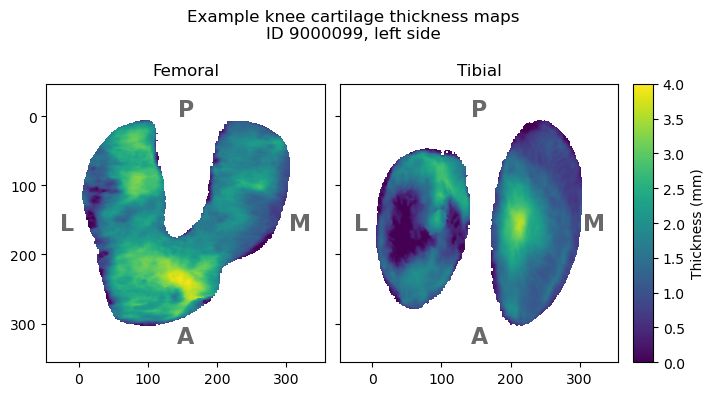

In [76]:
fig = plt.figure(figsize=(9.75, 4))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.15,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

grid[0].imshow(orient_femoral(example_knee['femoral']), vmin=0, vmax=4)

im = grid[1].imshow(orient_tibial(example_knee['tibial']), vmin=0, vmax=4)

grid[0].set_title('Femoral')
grid[1].set_title('Tibial')

annotate_cartilage(grid[0])
annotate_cartilage(grid[1])

mpl.colorbar.Colorbar(grid[1].cax, im, label="Thickness (mm)")

fig.suptitle(f"Example knee cartilage thickness maps\nID {patient_id}, {side} side")
fig.tight_layout()
fig.savefig('figs_tiff/example_knee.tiff', format='tiff', bbox_inches = "tight",
          pil_kwargs={"compression": "tiff_lzw"})

### Remove outlier
We want to drop an outlier that was flagged in the PCA analysis of the cartilage maps. But for some reason `ds.drop_sel(knee=(9284795,'left'))` doesn't work, so I have to find the iloc of that knee and drop it by position.

In [77]:
bad_position = ds.get_index('knee').get_loc((9284795,'left'))
bad_position

1545

In [78]:
ds = ds.drop_isel(knee=bad_position)

In [79]:
try:
    ds.sel(knee=(9284795,'left'))
except KeyError:
    print('Success')

Success


### Compute masks

In [80]:
fem_mask = ds['femoral'].notnull().all(dim='knee').persist()

In [81]:
tib_mask = ds['tibial'].notnull().all(dim='knee').persist()

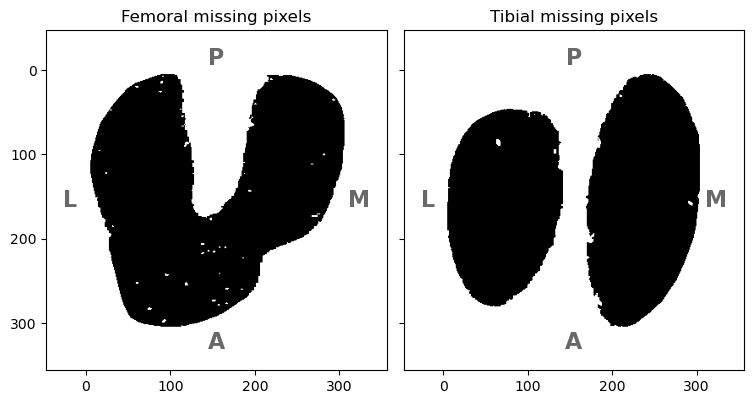

In [99]:
fig, (ax_f, ax_t) = plt.subplots(1, 2, figsize=(9, 6), sharey=True)
ax_f.imshow(orient_femoral(fem_mask), cmap='Greys')
ax_f.set_title("Femoral missing pixels")
ax_t.imshow(orient_tibial(tib_mask), cmap='Greys')
ax_t.set_title("Tibial missing pixels")

annotate_cartilage(ax_f)
annotate_cartilage(ax_t)
fig.subplots_adjust(wspace=0.05)

fig.savefig('figs_tiff/cartilage_masks.tiff', format='tiff', bbox_inches = "tight",
          pil_kwargs={"compression": "tiff_lzw"})

In [100]:
np.save('processed_data/femoral_mask.npy', fem_mask.to_numpy())
np.save('processed_data/tibial_mask.npy', tib_mask.to_numpy())

### Create two folds

In [101]:
dsu = ds.unstack('knee')
dsu

<xarray.Dataset>
Dimensions:       (patient_id: 3321, side: 2, x: 310, y: 310)
Coordinates:
  * patient_id    (patient_id) int64 9000099 9000296 9000622 ... 9999865 9999878
  * side          (side) <U5 'left' 'right'
    timepoint     int64 0
Dimensions without coordinates: x, y
Data variables: (12/79)
    Asian race    (patient_id, side) float64 dask.array<chunksize=(3321, 2), meta=np.ndarray>
    Black race    (patient_id, side) float64 dask.array<chunksize=(3321, 2), meta=np.ndarray>
    BothHP12      (patient_id, side) float64 dask.array<chunksize=(3321, 2), meta=np.ndarray>
    BothHRS       (patient_id, side) float64 dask.array<chunksize=(3321, 2), meta=np.ndarray>
    Female Sex    (patient_id, side) float64 dask.array<chunksize=(3321, 2), meta=np.ndarray>
    Is Married    (patient_id, side) float64 dask.array<chunksize=(3321, 2), meta=np.ndarray>
    ...            ...
    V00fSFP       (patient_id, side) float64 dask.array<chunksize=(3321, 2), meta=np.ndarray>
    V00fSFR       (patient_id, side) float64 dask.array<chunksize=(3321, 2), meta=np.ndarray>
    V00fmaxf      (patient_id, side) float64 dask.array<chunksize=(3321, 2), meta=np.ndarray>
    White race    (patient_id, side) float64 dask.array<chunksize=(3321, 2), meta=np.ndarray>
    femoral       (x, y, patient_id, side) float32 dask.array<chunksize=(310, 310, 1, 2), meta=np.ndarray>
    tibial        (x, y, patient_id, side) float32 dask.array<chunksize=(310, 310, 1, 2), meta=np.ndarray>

In [102]:
n = len(dsu['patient_id'])
n

3321

In [103]:
np.random.seed(824)
fold1 = np.random.choice(dsu['patient_id'], n//2 + 1, replace=False)
fold2 = np.setdiff1d(dsu['patient_id'], fold1)

In [104]:
fold1[:5]

array([9083898, 9017909, 9309170, 9562160, 9176200])

Check that the fold reproduces correctly--the first 5 elements should be as follows:

In [105]:
assert np.array_equal(fold1[:5], [9083898, 9017909, 9309170, 9562160, 9176200])

In [106]:
len(fold1)

1661

In [107]:
len(fold2)

1660

In [108]:
pd.Series(fold1, name='patient_id').to_csv('processed_data/fold1_ids.csv', index=False)
pd.Series(fold2, name='patient_id').to_csv('processed_data/fold2_ids.csv', index=False)

# Save fold 1 (model fitting)

In [109]:
ds_fold1 = dsu.sel(patient_id=fold1).stack(knee=['patient_id', 'side']).dropna('knee', 'all').chunk('auto')
ds_fold1

<xarray.Dataset>
Dimensions:       (knee: 3127, x: 310, y: 310)
Coordinates:
    timepoint     int64 0
  * knee          (knee) object MultiIndex
  * patient_id    (knee) int64 9083898 9083898 9017909 ... 9478285 9478285
  * side          (knee) <U5 'left' 'right' 'left' ... 'right' 'left' 'right'
Dimensions without coordinates: x, y
Data variables: (12/79)
    Asian race    (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    Black race    (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    BothHP12      (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    BothHRS       (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    Female Sex    (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    Is Married    (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    ...            ...
    V00fSFP       (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    V00fSFR       (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    V00fmaxf      (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    White race    (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    femoral       (x, y, knee) float32 dask.array<chunksize=(310, 310, 348), meta=np.ndarray>
    tibial        (x, y, knee) float32 dask.array<chunksize=(310, 310, 348), meta=np.ndarray>

In [110]:
femoral_vectorized_1 = ds_fold1['femoral'].stack(xy=('x','y')).sel(xy=fem_mask.stack(xy=['x','y']))
femoral_vectorized_1

<xarray.DataArray 'femoral' (knee: 3127, xy: 57260)>
dask.array<getitem, shape=(3127, 57260), dtype=float32, chunksize=(348, 57260), chunktype=numpy.ndarray>
Coordinates:
    timepoint   int64 0
  * knee        (knee) object MultiIndex
  * patient_id  (knee) int64 9083898 9083898 9017909 ... 9837054 9478285 9478285
  * side        (knee) <U5 'left' 'right' 'left' ... 'right' 'left' 'right'
  * xy          (xy) object MultiIndex
  * x           (xy) int64 5 5 5 5 5 5 5 5 5 ... 305 305 305 305 305 305 305 305
  * y           (xy) int64 108 109 110 111 112 113 114 ... 84 85 86 87 88 89 90

In [111]:
femoral_vectorized_1 = femoral_vectorized_1.to_dataset().reset_index(['knee', 'xy'])

In [112]:
femoral_vectorized_1

<xarray.Dataset>
Dimensions:     (knee: 3127, xy: 57260)
Coordinates:
    timepoint   int64 0
    patient_id  (knee) int64 9083898 9083898 9017909 ... 9837054 9478285 9478285
    side        (knee) <U5 'left' 'right' 'left' ... 'right' 'left' 'right'
    x           (xy) int64 5 5 5 5 5 5 5 5 5 ... 305 305 305 305 305 305 305 305
    y           (xy) int64 108 109 110 111 112 113 114 ... 84 85 86 87 88 89 90
Dimensions without coordinates: knee, xy
Data variables:
    femoral     (knee, xy) float32 dask.array<chunksize=(348, 57260), meta=np.ndarray>

In [113]:
femoral_vectorized_1.coords['side'] = femoral_vectorized_1.coords['side'].astype('unicode')

In [114]:
femoral_vectorized_1

<xarray.Dataset>
Dimensions:     (knee: 3127, xy: 57260)
Coordinates:
    timepoint   int64 0
    patient_id  (knee) int64 9083898 9083898 9017909 ... 9837054 9478285 9478285
    side        (knee) <U5 'left' 'right' 'left' ... 'right' 'left' 'right'
    x           (xy) int64 5 5 5 5 5 5 5 5 5 ... 305 305 305 305 305 305 305 305
    y           (xy) int64 108 109 110 111 112 113 114 ... 84 85 86 87 88 89 90
Dimensions without coordinates: knee, xy
Data variables:
    femoral     (knee, xy) float32 dask.array<chunksize=(348, 57260), meta=np.ndarray>

In [121]:
femoral_vectorized_1.to_zarr('processed_data/ajive_input_fold1/femoral.zarr')

In [125]:
tibial_vectorized_1 = ds_fold1['tibial'].stack(xy=('x','y')).sel(xy=tib_mask.stack(xy=['x','y']))
tibial_vectorized_1

<xarray.DataArray 'tibial' (knee: 3127, xy: 56340)>
dask.array<getitem, shape=(3127, 56340), dtype=float32, chunksize=(348, 56340), chunktype=numpy.ndarray>
Coordinates:
    timepoint   int64 0
  * knee        (knee) object MultiIndex
  * patient_id  (knee) int64 9083898 9083898 9017909 ... 9837054 9478285 9478285
  * side        (knee) <U5 'left' 'right' 'left' ... 'right' 'left' 'right'
  * xy          (xy) object MultiIndex
  * x           (xy) int64 6 6 6 6 6 6 6 6 6 ... 304 304 304 304 304 304 304 304
  * y           (xy) int64 89 90 91 92 93 94 95 ... 184 185 186 187 188 189 190

In [126]:
tibial_vectorized_1 = tibial_vectorized_1.to_dataset().reset_index(['knee', 'xy'])

In [127]:
tibial_vectorized_1.coords['side'] = tibial_vectorized_1.coords['side'].astype('unicode')

In [129]:
tibial_vectorized_1.to_zarr('processed_data/ajive_input_fold1/tibial.zarr')

In [130]:
clincal_fold1 = ds_fold1.drop_vars(['femoral','tibial']).reset_index('knee')
clincal_fold1

<xarray.Dataset>
Dimensions:       (knee: 3127)
Coordinates:
    timepoint     int64 0
    patient_id    (knee) int64 9083898 9083898 9017909 ... 9478285 9478285
    side          (knee) <U5 'left' 'right' 'left' ... 'right' 'left' 'right'
Dimensions without coordinates: knee
Data variables: (12/77)
    Asian race    (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    Black race    (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    BothHP12      (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    BothHRS       (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    Female Sex    (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    Is Married    (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    ...            ...
    V00eSFP       (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    V00eSFR       (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    V00fSFP       (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    V00fSFR       (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    V00fmaxf      (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>
    White race    (knee) float64 dask.array<chunksize=(3127,), meta=np.ndarray>

In [131]:
clincal_fold1.to_zarr('processed_data/ajive_input_fold1/clinical.zarr')

/opt/miniconda3/envs/baselinecartilage/lib/python3.10/site-packages/xarray/core/dataset.py:2077: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore


# Save validation fold

In [132]:
ds_fold2 = dsu.sel(patient_id=fold2).stack(knee=['patient_id', 'side']).dropna('knee', 'all').chunk('auto')
ds_fold2

<xarray.Dataset>
Dimensions:       (knee: 3138, x: 310, y: 310)
Coordinates:
    timepoint     int64 0
  * knee          (knee) object MultiIndex
  * patient_id    (knee) int64 9000099 9000099 9000296 ... 9999865 9999865
  * side          (knee) <U5 'left' 'right' 'left' ... 'right' 'left' 'right'
Dimensions without coordinates: x, y
Data variables: (12/79)
    Asian race    (knee) float64 dask.array<chunksize=(3138,), meta=np.ndarray>
    Black race    (knee) float64 dask.array<chunksize=(3138,), meta=np.ndarray>
    BothHP12      (knee) float64 dask.array<chunksize=(3138,), meta=np.ndarray>
    BothHRS       (knee) float64 dask.array<chunksize=(3138,), meta=np.ndarray>
    Female Sex    (knee) float64 dask.array<chunksize=(3138,), meta=np.ndarray>
    Is Married    (knee) float64 dask.array<chunksize=(3138,), meta=np.ndarray>
    ...            ...
    V00fSFP       (knee) float64 dask.array<chunksize=(3138,), meta=np.ndarray>
    V00fSFR       (knee) float64 dask.array<chunksize=(3138,), meta=np.ndarray>
    V00fmaxf      (knee) float64 dask.array<chunksize=(3138,), meta=np.ndarray>
    White race    (knee) float64 dask.array<chunksize=(3138,), meta=np.ndarray>
    femoral       (x, y, knee) float32 dask.array<chunksize=(310, 310, 348), meta=np.ndarray>
    tibial        (x, y, knee) float32 dask.array<chunksize=(310, 310, 348), meta=np.ndarray>

In [133]:
femoral_vectorized_2 = ds_fold2['femoral'].stack(xy=('x','y')).sel(xy=fem_mask.stack(xy=['x','y']))

In [134]:
femoral_vectorized_2 = femoral_vectorized_2.to_dataset().reset_index(['knee', 'xy'])

In [135]:
femoral_vectorized_2.coords['side'] = femoral_vectorized_2.coords['side'].astype('unicode')

In [136]:
femoral_vectorized_2.to_zarr('processed_data/ajive_input_fold2/femoral.zarr')

In [137]:
tibial_vectorized_2 = ds_fold2['tibial'].stack(xy=('x','y')).sel(xy=tib_mask.stack(xy=['x','y']))

In [138]:
tibial_vectorized_2 = tibial_vectorized_2.to_dataset().reset_index(['knee', 'xy'])

In [139]:
tibial_vectorized_2.coords['side'] = tibial_vectorized_2.coords['side'].astype('unicode')

In [ ]:
tibial_vectorized_2.to_zarr('processed_data/ajive_input_fold2/tibial.zarr')

In [ ]:
clincal_fold2 = ds_fold2.drop_vars(['femoral','tibial']).reset_index('knee')

In [ ]:
clincal_fold2.to_zarr('processed_data/ajive_input_fold2/clinical.zarr')